# Imports

In [1]:
import torch
from mae.models_mae import  mae_vit_base_patch16
from datetime import datetime
from tqdm import tqdm
import os 
import matplotlib.pyplot as plt
import requests
from dataset_loader.dataset import get_kinetics_dataset, unnormalize_for_plot, unnormalize
from ml.SiamMAE import CrossDecoder, SiamMAE, prepare_model, download_pretrained_model 
from ml.utils import plot_sample, train_one_epoch, train, plot_results_from_checkpoint


/home/eele/miniconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [2]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    
print("Using device =", device)

Using device = cuda


# SiamMAE

In [3]:
data = get_kinetics_dataset("./dataset/")

Loading dataset from ./dataset/


In [3]:
print(data.num_videos)

711


In [5]:
BATCH_SIZE = 8

data_loader = torch.utils.data.DataLoader(
    data,
    batch_size=BATCH_SIZE,
)

del data

torch.Size([8, 10, 3, 224, 224])


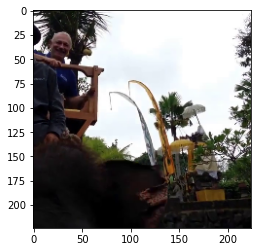

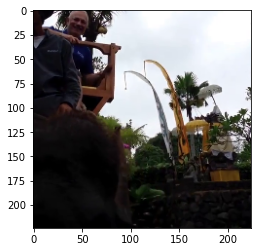

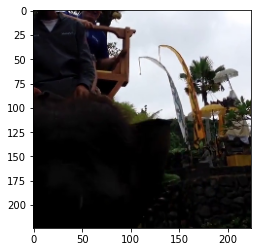

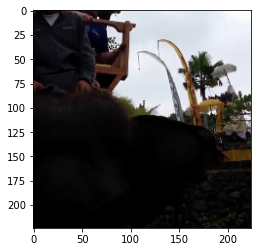

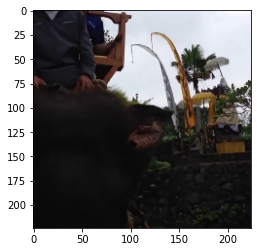

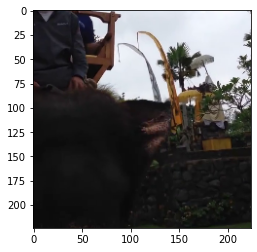

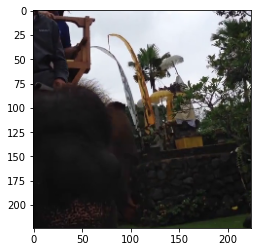

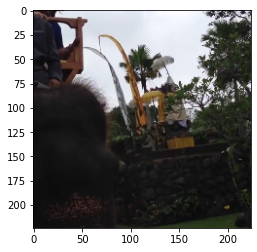

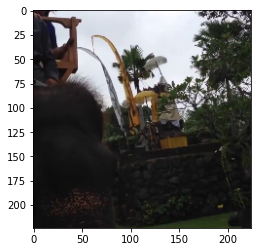

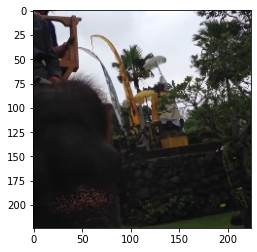

In [6]:
# torch.Size([3, 3, 224, 224])
for batch in data_loader:
    print(batch["video"].shape)
    # torch.Size([8, 4, 3, 224, 224])
    # [BATCH_SIZE x Frames x Channel x Height x Width ]

    for i in range(batch["video"].shape[1]):
        plt.imshow(unnormalize_for_plot(batch["video"][0][i]))
        plt.show()
    break

# Train From Scratch

In [6]:
mae_model = mae_vit_base_patch16().to(device)

In [12]:
train(SiamMAE(mae_model).to(device), data_loader, epochs=60)

Epoch 1


0it [00:00, ?it/s]

/home/eele/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 2, 3, 224, 224])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
88it [06:03,  5.02s/it]/home/eele/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([7, 2, 3, 224, 224])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
89it [06:06,  4.12s/it]


Avg Loss: 3.839482947681727
Epoch 2


89it [05:34,  3.75s/it]


Avg Loss: 3.2138407592023355
Epoch 3


89it [05:38,  3.80s/it]


Avg Loss: 3.1742505397689476
Epoch 4


89it [05:23,  3.64s/it]


Avg Loss: 3.2672121752513927
Epoch 5


89it [05:25,  3.65s/it]


Avg Loss: 3.115172162484587
Epoch 6


89it [05:24,  3.65s/it]


Avg Loss: 3.0964999707897056
Epoch 7


89it [05:26,  3.67s/it]


Avg Loss: 3.1470764486977223
Epoch 8


89it [05:22,  3.62s/it]


Avg Loss: 3.1110010562318093
Epoch 9


89it [05:21,  3.61s/it]


Avg Loss: 3.029114349504535
Epoch 10


89it [05:15,  3.55s/it]


Avg Loss: 2.95223124107618
Epoch 11


89it [05:34,  3.76s/it]


Avg Loss: 2.835506364200892
Epoch 12


89it [05:18,  3.58s/it]


Avg Loss: 3.1096683231632363
Epoch 13


89it [05:21,  3.61s/it]


Avg Loss: 2.8868413225988325
Epoch 14


89it [05:21,  3.61s/it]


Avg Loss: 2.8257873795005715
Epoch 15


89it [05:24,  3.64s/it]


Avg Loss: 2.720016969723648
Epoch 16


89it [05:18,  3.57s/it]


Avg Loss: 2.5691821628742004
Epoch 17


89it [05:19,  3.59s/it]


Avg Loss: 2.4663667009117898
Epoch 18


89it [05:18,  3.58s/it]


Avg Loss: 2.5494320352425737
Epoch 19


89it [05:16,  3.56s/it]


Avg Loss: 2.3038668257466863
Epoch 20


89it [05:19,  3.59s/it]


Avg Loss: 2.2488085848561834
Epoch 21


89it [05:46,  3.90s/it]


Avg Loss: 2.2421722197800538
Epoch 22


89it [05:23,  3.64s/it]


Avg Loss: 2.2316099646386136
Epoch 23


89it [05:19,  3.59s/it]


Avg Loss: 2.199414599477575
Epoch 24


89it [05:22,  3.63s/it]


Avg Loss: 2.1873511598351296
Epoch 25


89it [05:22,  3.63s/it]


Avg Loss: 2.167729987187332
Epoch 26


89it [05:21,  3.62s/it]


Avg Loss: 2.1433601473154646
Epoch 27


89it [05:18,  3.58s/it]


Avg Loss: 2.110021986318438
Epoch 28


89it [05:21,  3.62s/it]


Avg Loss: 2.062227066982998
Epoch 29


89it [05:22,  3.62s/it]


Avg Loss: 2.1375356175926292
Epoch 30


89it [05:18,  3.58s/it]


Avg Loss: 2.1086096830582353
Epoch 31


89it [05:26,  3.66s/it]


Avg Loss: 2.1243969436441916
Epoch 32


89it [05:21,  3.62s/it]


Avg Loss: 2.1162677266624534
Epoch 33


89it [05:26,  3.66s/it]


Avg Loss: 2.1178101716416604
Epoch 34


89it [05:23,  3.63s/it]


Avg Loss: 2.100858486100529
Epoch 35


89it [05:31,  3.72s/it]


Avg Loss: 2.0881712195578586
Epoch 36


89it [05:28,  3.69s/it]


Avg Loss: 2.074374422598421
Epoch 37


89it [05:29,  3.70s/it]


Avg Loss: 2.114979812268461
Epoch 38


89it [05:33,  3.75s/it]


Avg Loss: 2.043129812465625
Epoch 39


89it [05:21,  3.61s/it]


Avg Loss: 2.2694692504539917
Epoch 40


89it [05:18,  3.57s/it]


Avg Loss: 2.0880072277583435
Epoch 41


89it [05:23,  3.64s/it]


Avg Loss: 2.0294023457537875
Epoch 42


89it [05:25,  3.66s/it]


Avg Loss: 2.07054151711839
Epoch 43


89it [05:20,  3.60s/it]


Avg Loss: 2.074154990442683
Epoch 44


89it [05:19,  3.59s/it]


Avg Loss: 2.00627787126584
Epoch 45


89it [05:20,  3.60s/it]


Avg Loss: 2.001404272036606
Epoch 46


89it [05:19,  3.59s/it]


Avg Loss: 2.026022738285279
Epoch 47


89it [05:14,  3.54s/it]


Avg Loss: 2.0154681915647528
Epoch 48


89it [05:26,  3.67s/it]


Avg Loss: 2.2017171034652194
Epoch 49


89it [05:27,  3.68s/it]


Avg Loss: 2.052723781446393
Epoch 50


89it [05:30,  3.71s/it]


Avg Loss: 2.0210353872749245
Epoch 51


89it [05:39,  3.81s/it]


Avg Loss: 2.014938422803129
Epoch 52


89it [05:28,  3.70s/it]


Avg Loss: 2.067056625746609
Epoch 53


89it [05:27,  3.68s/it]


Avg Loss: 2.012793597210659
Epoch 54


89it [05:16,  3.55s/it]


Avg Loss: 2.041017904710234
Epoch 55


89it [05:19,  3.59s/it]


Avg Loss: 1.9995402526319697
Epoch 56


89it [05:46,  3.89s/it]


Avg Loss: 2.022214404652628
Epoch 57


89it [05:43,  3.86s/it]


Avg Loss: 2.0037560288825733
Epoch 58


89it [05:32,  3.74s/it]


Avg Loss: 2.015967601470733
Epoch 59


89it [05:37,  3.79s/it]


Avg Loss: 2.0306341648101807
Epoch 60


89it [05:35,  3.77s/it]


Avg Loss: 1.979054130864947


In [10]:
model_path = f"checkpoints/2023-11-22_18:32:24/final.pt"
model = torch.load(model_path).to(device)

In [12]:
sample = next(iter(data_loader))["video"]

torch.Size([8, 196, 768])
torch.Size([8, 3, 224, 224])


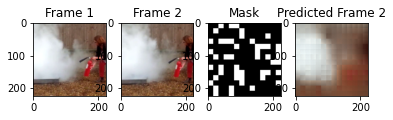

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


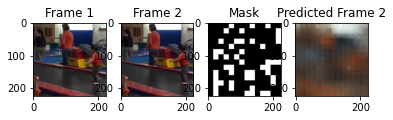

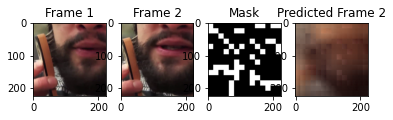

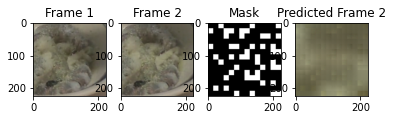

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


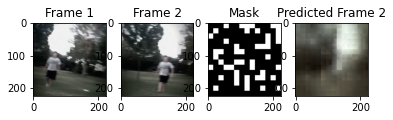

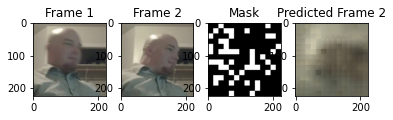

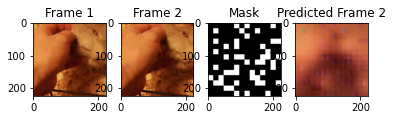

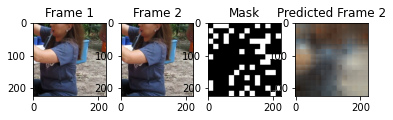

In [24]:
plot_sample(sample, model, device)

# Pretrained

In [3]:
download_pretrained_model()

In [16]:
siam_pretrained = SiamMAE(prepare_model()).to(device)

Epoch 1


0it [00:00, ?it/s]/home/eele/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 2, 3, 224, 224])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
88it [06:39,  4.92s/it]/home/eele/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([7, 2, 3, 224, 224])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
89it [06:42,  4.52s/it]


Avg Loss: 2.583556978890065
Epoch 2


89it [05:35,  3.77s/it]


Avg Loss: 1.9251691411050518
Epoch 3


89it [05:21,  3.61s/it]


Avg Loss: 1.8518442330735454
Epoch 4


89it [05:15,  3.54s/it]


Avg Loss: 1.8842760364661055
Epoch 5


89it [05:10,  3.49s/it]


Avg Loss: 1.8213373703903026
Epoch 6


89it [05:18,  3.58s/it]


Avg Loss: 1.8086306566602728
Epoch 7


89it [05:23,  3.64s/it]


Avg Loss: 1.77450582820378
Epoch 8


89it [05:09,  3.48s/it]


Avg Loss: 1.8158016526297238
Epoch 9


89it [05:22,  3.62s/it]


Avg Loss: 1.7853066606468029
Epoch 10


89it [05:19,  3.59s/it]


Avg Loss: 1.7799522903528107


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


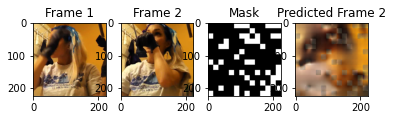

Epoch 11


89it [05:18,  3.58s/it]


Avg Loss: 1.7460109236535062
Epoch 12


89it [05:12,  3.51s/it]


Avg Loss: 1.740590775280856
Epoch 13


89it [05:14,  3.53s/it]


Avg Loss: 1.7658184512277668
Epoch 14


89it [05:10,  3.49s/it]


Avg Loss: 1.7406868425647863
Epoch 15


89it [05:16,  3.55s/it]


Avg Loss: 1.7524319471937886
Epoch 16


89it [05:10,  3.49s/it]


Avg Loss: 1.7598258631952692
Epoch 17


89it [05:05,  3.44s/it]


Avg Loss: 1.7522666032394667
Epoch 18


89it [05:09,  3.48s/it]


Avg Loss: 1.711929294500458
Epoch 19


89it [05:16,  3.56s/it]


Avg Loss: 1.7394465596488353
Epoch 20


89it [05:13,  3.52s/it]


Avg Loss: 1.7347847370619185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


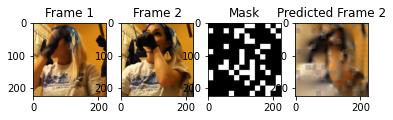

Epoch 21


89it [05:19,  3.59s/it]


Avg Loss: 1.7264217741034005
Epoch 22


89it [05:08,  3.47s/it]


Avg Loss: 1.7830388512504234
Epoch 23


89it [05:09,  3.48s/it]


Avg Loss: 1.7157443333207891
Epoch 24


89it [05:07,  3.45s/it]


Avg Loss: 1.736770589699906
Epoch 25


89it [05:08,  3.47s/it]


Avg Loss: 1.7325146559918865
Epoch 26


89it [05:10,  3.49s/it]


Avg Loss: 1.7064683035518347
Epoch 27


89it [05:07,  3.46s/it]


Avg Loss: 1.7428278052405026
Epoch 28


89it [05:10,  3.49s/it]


Avg Loss: 1.7279625782805883
Epoch 29


89it [05:07,  3.45s/it]


Avg Loss: 1.6926363532462816
Epoch 30


89it [05:03,  3.41s/it]


Avg Loss: 1.7289251973120014


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


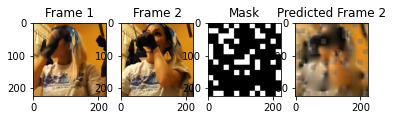

Epoch 31


89it [05:14,  3.53s/it]


Avg Loss: 1.705478860421127
Epoch 32


89it [05:11,  3.50s/it]


Avg Loss: 1.7166390566343672
Epoch 33


89it [05:13,  3.52s/it]


Avg Loss: 1.705645624841197
Epoch 34


89it [05:05,  3.44s/it]


Avg Loss: 1.7365909647405817
Epoch 35


89it [05:10,  3.49s/it]


Avg Loss: 1.729154176926345
Epoch 36


89it [05:15,  3.54s/it]


Avg Loss: 1.75904350736168
Epoch 37


89it [05:04,  3.42s/it]


Avg Loss: 1.7177759710322604
Epoch 38


89it [05:05,  3.44s/it]


Avg Loss: 1.6981945011053192
Epoch 39


89it [05:05,  3.43s/it]


Avg Loss: 1.7223733275124196
Epoch 40


89it [05:06,  3.44s/it]


Avg Loss: 1.7167491551195637


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


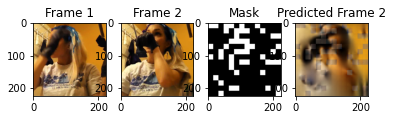

Epoch 41


89it [05:18,  3.58s/it]


Avg Loss: 1.7193310742967585
Epoch 42


89it [05:18,  3.58s/it]


Avg Loss: 1.75235116347838
Epoch 43


89it [05:22,  3.62s/it]


Avg Loss: 1.7175391122196497
Epoch 44


89it [05:21,  3.62s/it]


Avg Loss: 1.7072400731986828
Epoch 45


89it [05:14,  3.54s/it]


Avg Loss: 1.7187052536546514
Epoch 46


89it [05:05,  3.43s/it]


Avg Loss: 1.7194434310613054
Epoch 47


89it [05:05,  3.43s/it]


Avg Loss: 1.721474088979571
Epoch 48


89it [05:05,  3.43s/it]


Avg Loss: 1.7008268565274356
Epoch 49


89it [05:11,  3.50s/it]


Avg Loss: 1.7177300245574352
Epoch 50


89it [05:10,  3.49s/it]


Avg Loss: 1.7374359556798185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


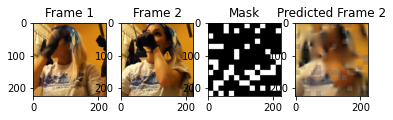

Epoch 51


89it [05:12,  3.51s/it]


Avg Loss: 1.714015739017658
Epoch 52


89it [05:11,  3.50s/it]


Avg Loss: 1.7192394097199601
Epoch 53


89it [05:12,  3.51s/it]


Avg Loss: 1.7179594441746058
Epoch 54


89it [05:12,  3.52s/it]


Avg Loss: 1.7052937304036002
Epoch 55


89it [05:04,  3.43s/it]


Avg Loss: 1.7248413067185477
Epoch 56


89it [05:21,  3.61s/it]


Avg Loss: 1.7014709322640065
Epoch 57


89it [05:07,  3.46s/it]


Avg Loss: 1.7134474355183291
Epoch 58


89it [05:12,  3.51s/it]


Avg Loss: 1.7312284138765228
Epoch 59


89it [05:12,  3.51s/it]


Avg Loss: 1.7163883862870464
Epoch 60


89it [05:08,  3.47s/it]


Avg Loss: 1.7078391099244021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


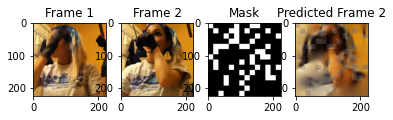

Epoch 61


2it [00:09,  4.91s/it]


KeyboardInterrupt: 

In [17]:
train(siam_pretrained, data_loader, prefix="pretrained_", epochs=100)

# Pretraining More Data

## 1K --> 5k Videos



In [4]:
data = get_kinetics_dataset("./dataset/")

Loading dataset from ./dataset/


In [10]:
print(data.num_videos)

4121


In [5]:
BATCH_SIZE = 8

data_loader = torch.utils.data.DataLoader(
    data,
    batch_size=BATCH_SIZE,
)

del data

In [13]:
siam_pretrained = SiamMAE(prepare_model()).to(device)

<All keys matched successfully>


In [ ]:
train(siam_pretrained, data_loader, epochs=10, num_epochs_per_save=2, prefix="5k_")

# 50% Masking Ratio

In [12]:
siam_pretrained = SiamMAE(prepare_model(), mask_ratio=0.5).to(device)

<All keys matched successfully>


Epoch 1


516it [34:03,  3.96s/it]


Avg Loss: 0.33786305478348055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


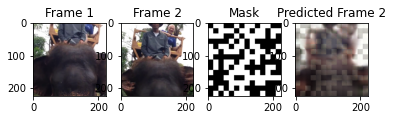

Epoch 2


516it [34:59,  4.07s/it]


Avg Loss: 0.19542173826669942


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


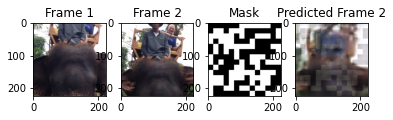

Epoch 3


516it [30:44,  3.58s/it]


Avg Loss: 0.1789547970532909


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


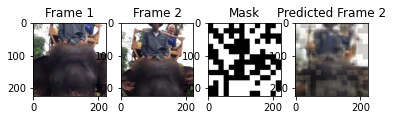

Epoch 4


516it [31:00,  3.61s/it]


Avg Loss: 0.17402812819061583


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


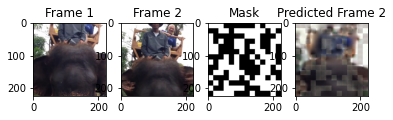

Epoch 5


516it [30:30,  3.55s/it]


Avg Loss: 0.17040149634343016


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


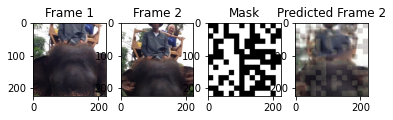

Epoch 6


516it [30:41,  3.57s/it]


Avg Loss: 0.168300159109482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


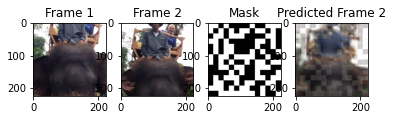

Epoch 7


516it [30:45,  3.58s/it]


Avg Loss: 0.16473321789918943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


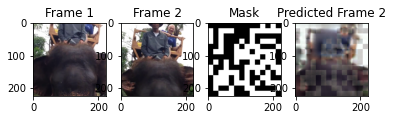

Epoch 8


516it [30:42,  3.57s/it]


Avg Loss: 0.16489009588754686


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


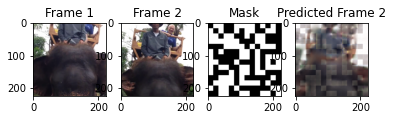

Epoch 9


516it [30:47,  3.58s/it]


Avg Loss: 0.16485583299929782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


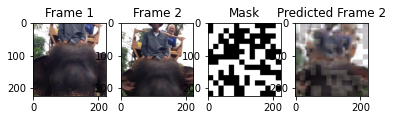

Epoch 10


516it [30:37,  3.56s/it]


Avg Loss: 0.16184528081049754


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


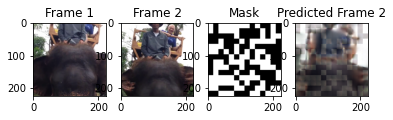

In [13]:
train(siam_pretrained, data_loader, epochs=10, num_epochs_per_save=2, prefix="5k_50_")

# 95% Masking Ratio


In [6]:
siam_pretrained = SiamMAE(prepare_model(), mask_ratio=0.95).to(device)

<All keys matched successfully>


Epoch 1


603it [35:54,  3.57s/it]


Avg Loss: 0.7840317160039398


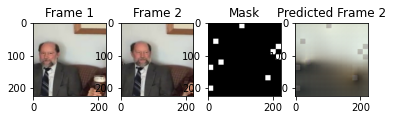

Epoch 2


603it [34:36,  3.44s/it]


Avg Loss: 0.657602570691512


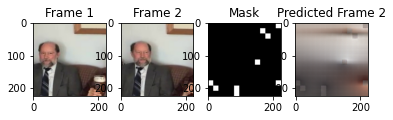

Epoch 3


603it [34:07,  3.40s/it]


Avg Loss: 0.6105948749614593


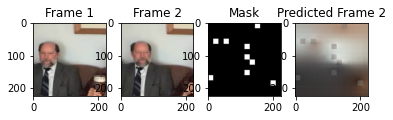

Epoch 4


603it [34:10,  3.40s/it]


Avg Loss: 0.5911799604026833


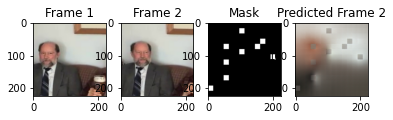

Epoch 5


603it [34:31,  3.44s/it]


Avg Loss: 0.5810980933716838


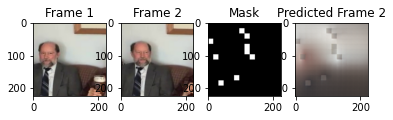

Epoch 6


603it [33:52,  3.37s/it]


Avg Loss: 0.5613021122084724


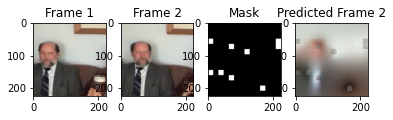

Epoch 7


603it [34:46,  3.46s/it]


Avg Loss: 0.5561778940272766


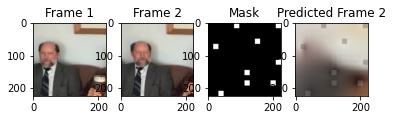

Epoch 8


603it [34:37,  3.45s/it]


Avg Loss: 0.5482524336619954


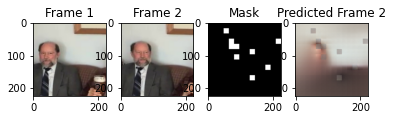

Epoch 9


603it [34:53,  3.47s/it]


Avg Loss: 0.5337120595559552


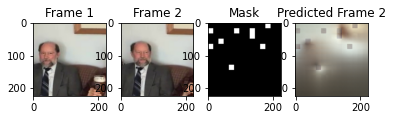

Epoch 10


603it [34:08,  3.40s/it]


Avg Loss: 0.5342946452633857


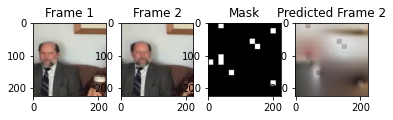

In [7]:
train(siam_pretrained, data_loader, epochs=10, num_epochs_per_save=2, prefix="5k_95_")

# Large Model


In [3]:
data = get_kinetics_dataset("./dataset/")

Loading dataset from ./dataset/


In [4]:
BATCH_SIZE = 8

data_loader = torch.utils.data.DataLoader(
    data,
    batch_size=BATCH_SIZE,
)

del data

In [4]:
download_pretrained_model(model_url="https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large_ganloss.pth", chkpt_dir="checkpoints/mae_gan_pretrained.pth")

In [5]:
siam_pretrained_large = SiamMAE(prepare_model(chkpt_dir="checkpoints/mae_gan_pretrained.pth", arch="mae_vit_large_patch16")).to(device)

<All keys matched successfully>


Epoch 1


516it [1:42:39, 11.94s/it]


Avg Loss: 0.47152161348408966


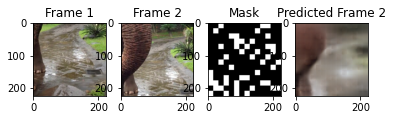

Epoch 2


516it [1:39:14, 11.54s/it]


Avg Loss: 0.29316677838968214


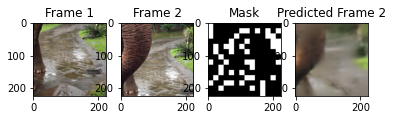

Epoch 3


516it [1:41:33, 11.81s/it]


Avg Loss: 0.27035169800122577


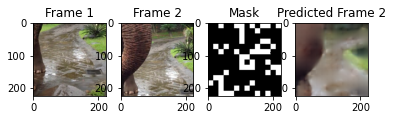

Epoch 4


516it [1:43:27, 12.03s/it]


Avg Loss: 0.25847544668372285


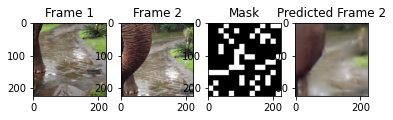

Epoch 5


516it [1:45:18, 12.25s/it]


Avg Loss: 0.25230435430714787


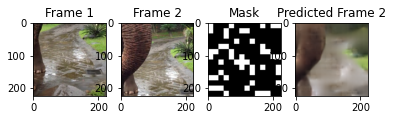

Epoch 6


516it [1:44:35, 12.16s/it]


Avg Loss: 0.24587316481873048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


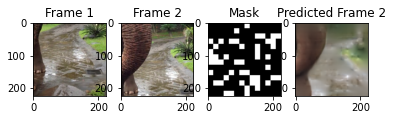

In [6]:
train(siam_pretrained_large, data_loader, prefix="pretrained_large_", epochs=6, num_epochs_per_save=2)

# Plot the Results

In [ ]:
plot_results_from_checkpoint("5k_2023-11-27_12:55:32/10.pt", data_loader, device)

In [ ]:
plot_results_from_checkpoint("5k_50_2023-11-27_12:55:32/10.pt", data_loader, device)

# Test

In [3]:
data_test = get_kinetics_dataset("./dataset/test")
BATCH_SIZE = 8
data_loader_test = torch.utils.data.DataLoader(
    data_test,
    batch_size=BATCH_SIZE,
)
del data_test

Loading dataset from ./dataset/test


In [ ]:
samples = [next(iter(data_loader_test))["video"] for _ in range(10)]

import pickle
with open("samples.pickle", "wb") as f:
    pickle.dump(samples, f)

# From Scratch Less Videos (1k) - 75% Masking Ratio

In [ ]:
plot_results_from_checkpoint("scratch_2023-11-22_18:32:24/final.pt", data_loader_test, device)
# NAN because we only ran this overfitting experiment to verify that our implementation functioned correctly

# Pretrained Less Videos (1K) - 75% Masking Ratio

In [ ]:
plot_results_from_checkpoint("pretrained_2023-11-24_13:09:26/60.pt", data_loader_test, device)  
# NAN because we only ran this overfitting experiment to verify that our implementation functioned correctly

# Pretrained Base Model Videos (5k) - 95% Masking Ratio

88it [07:46,  5.30s/it]


Avg Loss: 0.5480424524708227


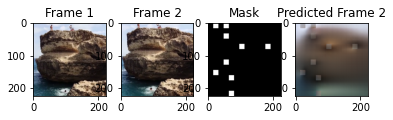

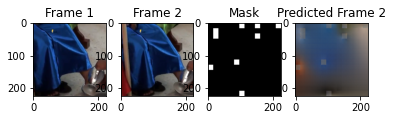

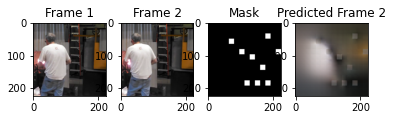

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


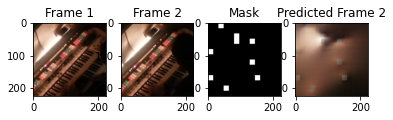

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


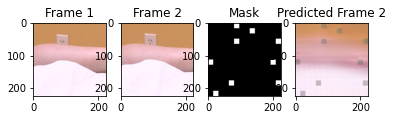

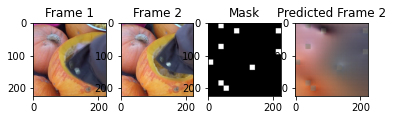

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


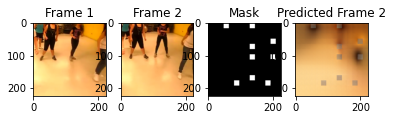

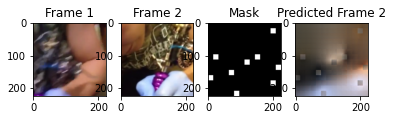

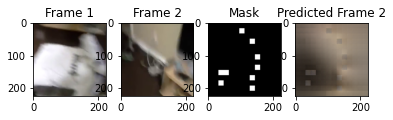

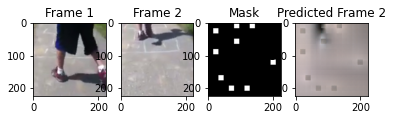

In [5]:
plot_results_from_checkpoint("5k_95_2023-12-04_15:13:38/10.pt", data_loader_test, device)

# Pretrained Base Model Videos (5k) - 75% Masking Ratio

88it [07:19,  4.99s/it]


Avg Loss: 0.2522970614954829


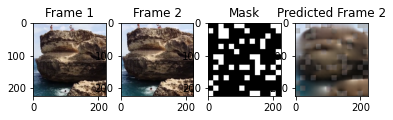

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


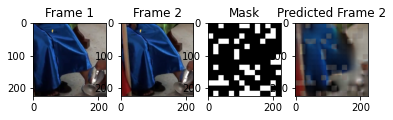

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


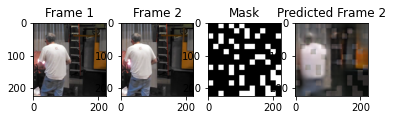

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


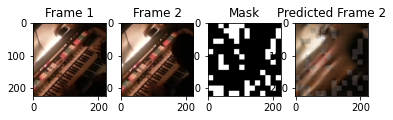

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


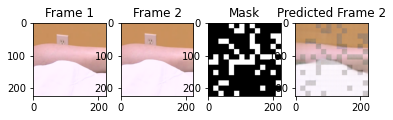

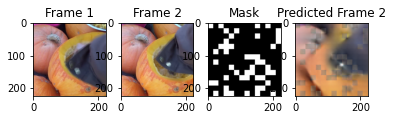

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


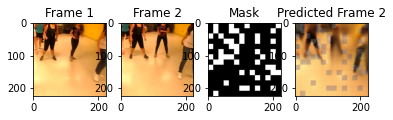

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


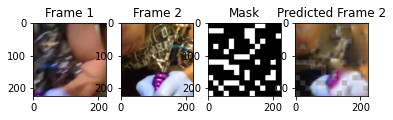

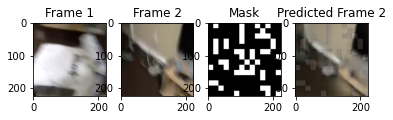

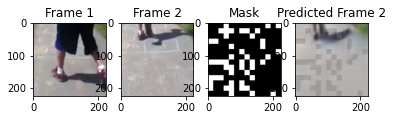

In [5]:
plot_results_from_checkpoint("5k_2023-11-27_12:55:32/10.pt", data_loader_test, device)

# Pretrained Base Model Videos (5k) - 50% Masking Ratio

88it [07:58,  5.44s/it]


Avg Loss: 0.155223560096188


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


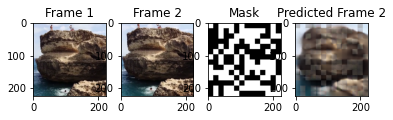

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


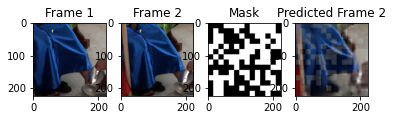

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


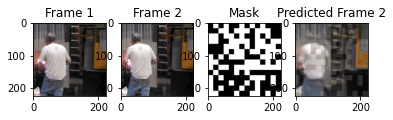

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


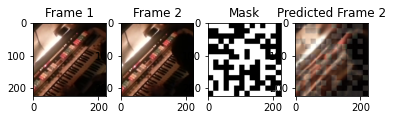

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


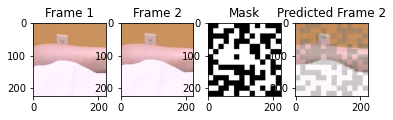

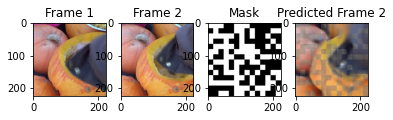

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


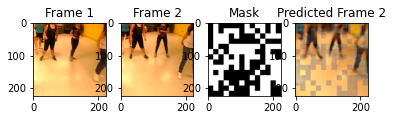

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


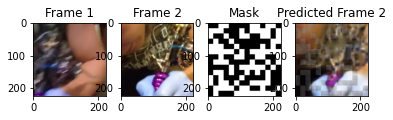

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


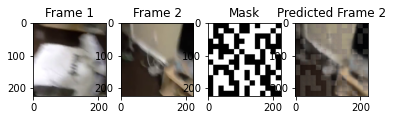

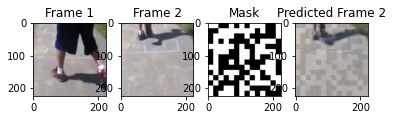

In [4]:
plot_results_from_checkpoint("5k_50_2023-11-27_19:05:02/10.pt", data_loader_test, device)

# Pretrained Large Model Videos (5k) -  75% Masking Ratio

88it [14:34,  9.94s/it]


Avg Loss: 0.23440387963571332


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


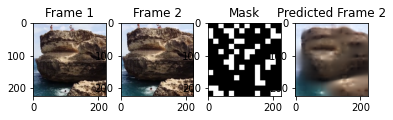

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


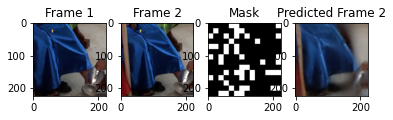

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


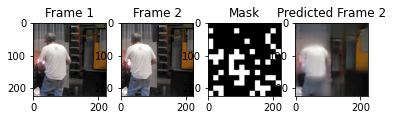

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


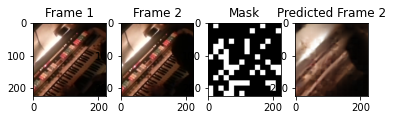

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


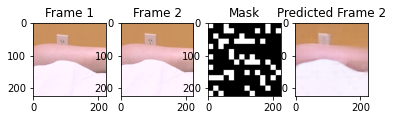

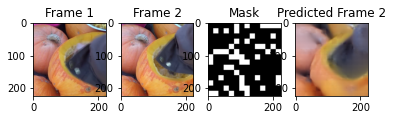

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


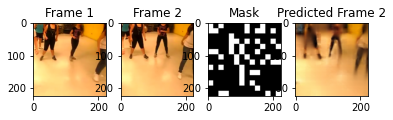

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


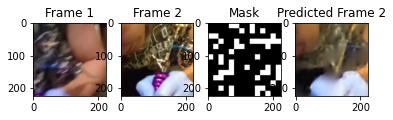

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


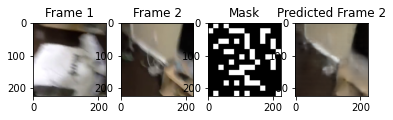

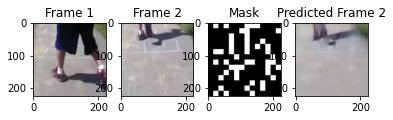

In [4]:
plot_results_from_checkpoint("pretrained_large_2023-11-29_15:53:42/6.pt", data_loader_test, device)

# Compare Training and Test Loss for Each Model

In [7]:
checkpoints = [
"pretrained_large_2023-11-29_15:53:42/6.pt",
"5k_50_2023-11-27_19:05:02/10.pt",
"5k_2023-11-27_12:55:32/10.pt",
"5k_95_2023-12-04_15:13:38/10.pt"
]

checkpoints_without_model = [checkpoint.split("/")[0] for checkpoint in checkpoints]

def get_avg_loss(line):
    import re

    match = re.search(r"Avg Loss: (\d+\.\d+)", line)
    if match:
        return float(match.group(1))
    else:
        return None

def get_avg_losses_from_file(checkpoints_without_model, folder_path="./losses"):
    losses = {}
    for checkpoint in checkpoints_without_model:
        losses_for_epoch = []
        with open(f"{folder_path}/{checkpoint}.txt", "r") as f:
            lines = f.readlines()
            for line in lines:
                if "Avg Loss" in line:
                    losses_for_epoch.append(get_avg_loss(line))
        losses[checkpoint] = losses_for_epoch
    return losses

In [8]:
avg_train_losses = get_avg_losses_from_file(checkpoints_without_model, folder_path="./losses")
final_test_losses = get_avg_losses_from_file(checkpoints_without_model, folder_path="./test_losses")

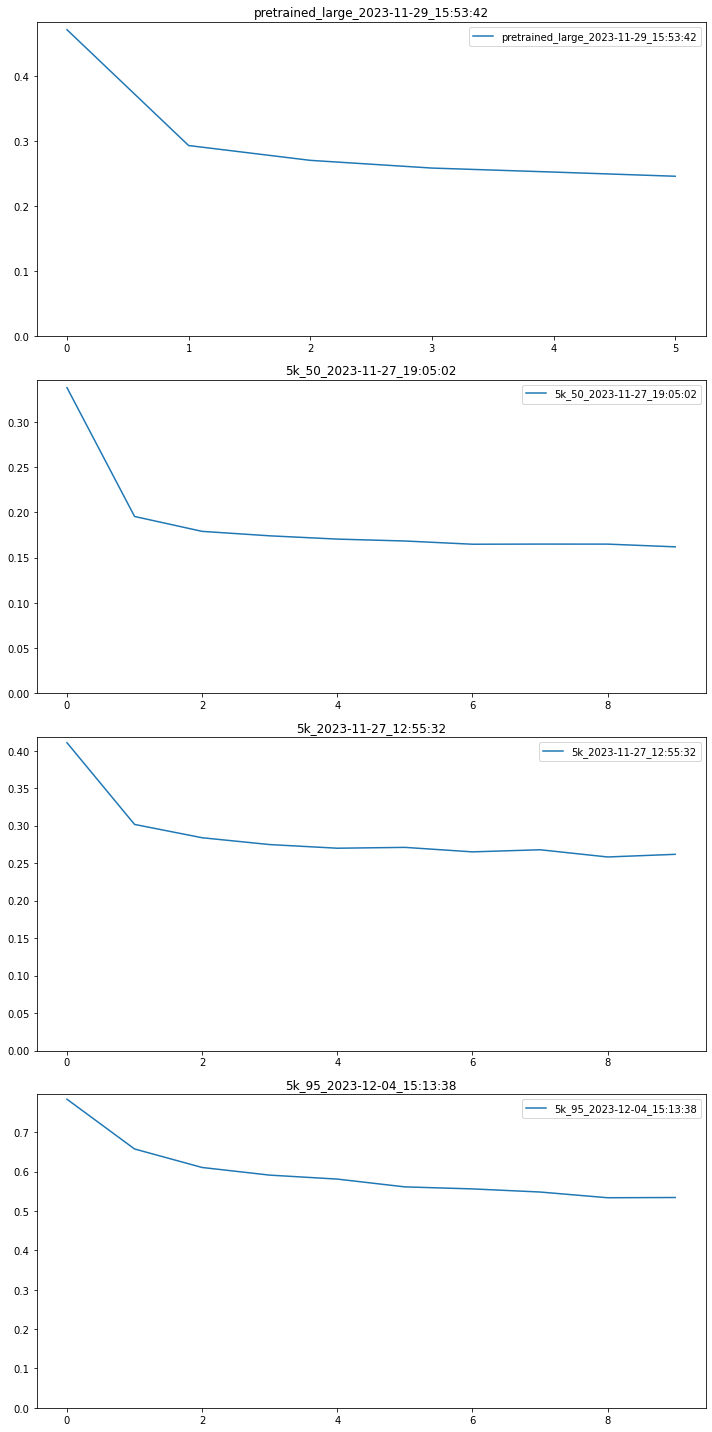

In [13]:
fig, axs = plt.subplots(len(avg_train_losses), 1, figsize=(10, 5*len(avg_train_losses)))

for ax, (model, avg_losses) in zip(axs, avg_train_losses.items()):
    ax.plot(avg_losses, label=model)
    ax.legend()
    ax.set_title(model)
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

In [12]:
for (train_model, train_losses), (test_model, test_losses) in zip(avg_train_losses.items(), final_test_losses.items()):
    print(f"{train_model}")
    print(f"Train: {train_losses[-1]}")
    print(f"Test: {test_losses[-1]}")
    print()

pretrained_large_2023-11-29_15:53:42
Train: 0.24587316481873048
Test: 0.23440387963571332

5k_50_2023-11-27_19:05:02
Train: 0.16184528081049754
Test: 0.155223560096188

5k_2023-11-27_12:55:32
Train: 0.2617590852919244
Test: 0.2522970614954829

5k_95_2023-12-04_15:13:38
Train: 0.5342946452633857
Test: 0.5480424524708227

